## House Price Prediction using Linear Regression

#### Required Libraries

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv
from numpy.linalg import inv

#### Importing Data

In [2]:
inputData = pd.read_csv('Housing Price data sets.csv', index_col=0)
inputData[:5]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


#### Organizing the data

In [3]:
inputData.driveway.replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
inputData.recroom.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
inputData.fullbase.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
inputData.gashw.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
inputData.airco.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
inputData.prefarea.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
x = inputData.drop(['price'], axis = 1)
x = numpy.array(x)

In [4]:
y = inputData['price']
y = numpy.array(y)

In [5]:
x[:5]

array([[5850,    3,    1,    2,    1,    0,    1,    0,    0,    1,    0],
       [4000,    2,    1,    1,    1,    0,    0,    0,    0,    0,    0],
       [3060,    3,    1,    1,    1,    0,    0,    0,    0,    0,    0],
       [6650,    3,    1,    2,    1,    1,    0,    0,    0,    0,    0],
       [6360,    2,    1,    1,    1,    0,    0,    0,    0,    0,    0]])

In [6]:
y[:5]

array([42000., 38500., 49500., 60500., 61000.])

In [7]:
y = y.reshape(546, 1)
print(y.shape)
print(x.shape)

(546, 1)
(546, 11)


#### Cost Function

In [8]:
def cost(x, y, w):
    m = x.shape[0]
    ans = (numpy.sum(numpy.square(numpy.matmul(x, w) - y)))/(2*m)
    return ans
def costLamb(X, Y, theta, lambdaVar):
    m = X.shape[0]
    a = (1/(2*m))*(lambdaVar * numpy.sum(theta ** 2))
    return (1/(2*m))*(numpy.sum(numpy.square(numpy.matmul(X, theta) - Y))) + a

In [9]:
def calcdj(x, y, w, lamb):
    m = x.shape[0]
    ans = (numpy.matmul(x.transpose(), (numpy.matmul(x, w) - y)))/(m) + numpy.sum(lamb) * (1/m)
    return ans

In [10]:
x = numpy.c_[numpy.ones(x.shape[0]),numpy.array(x)]
print(x.shape)

(546, 12)


In [11]:
def normalise(inp):
    return numpy.array((inp-inp.mean())/inp.std())

In [12]:
x = x[:, 1:]
normx = normalise(x)
normy = normalise(y)

In [13]:
normx = numpy.c_[numpy.ones(normx.shape[0]),numpy.array(normx)]

In [14]:
normx[:5]

array([[ 1.        ,  3.32566332, -0.28800578, -0.28924186, -0.28862382,
        -0.28924186, -0.2898599 , -0.28924186, -0.2898599 , -0.2898599 ,
        -0.28924186, -0.2898599 ],
       [ 1.        ,  2.18229273, -0.28862382, -0.28924186, -0.28924186,
        -0.28924186, -0.2898599 , -0.2898599 , -0.2898599 , -0.2898599 ,
        -0.2898599 , -0.2898599 ],
       [ 1.        ,  1.60133687, -0.28800578, -0.28924186, -0.28924186,
        -0.28924186, -0.2898599 , -0.2898599 , -0.2898599 , -0.2898599 ,
        -0.2898599 , -0.2898599 ],
       [ 1.        ,  3.82009385, -0.28800578, -0.28924186, -0.28862382,
        -0.28924186, -0.28924186, -0.2898599 , -0.2898599 , -0.2898599 ,
        -0.2898599 , -0.2898599 ],
       [ 1.        ,  3.64086278, -0.28862382, -0.28924186, -0.28924186,
        -0.28924186, -0.2898599 , -0.2898599 , -0.2898599 , -0.2898599 ,
        -0.2898599 , -0.2898599 ]])

#### Using Gradient Descent Equation

In [15]:
normW = numpy.random.randn(12, 1)
normW = numpy.array(normW)
print(normW)

[[ 0.19942352]
 [ 0.34096206]
 [ 0.2818517 ]
 [ 0.51851591]
 [-0.92614748]
 [ 0.31006581]
 [-2.00979747]
 [-0.45905933]
 [-0.1423099 ]
 [-0.64562808]
 [ 0.02351734]
 [-0.36176653]]


In [16]:
totalRep = 10000
curRep= 0
learningRate = 0.01
costs = numpy.empty([totalRep])
while curRep < totalRep:
    curCost = costLamb(normx, normy, normW, 1)
    dj = calcdj(normx, normy, normW, 1)
    normW = normW - learningRate * dj
    costs[curRep] = curCost
    curRep = curRep + 1

In [17]:
print(normW)

[[-1.42856559]
 [ 0.39632641]
 [ 0.52805514]
 [ 0.76601263]
 [-0.67177772]
 [ 0.54821729]
 [-1.76993999]
 [-0.21893342]
 [ 0.09455805]
 [-0.40042658]
 [ 0.26948845]
 [-0.12079831]]


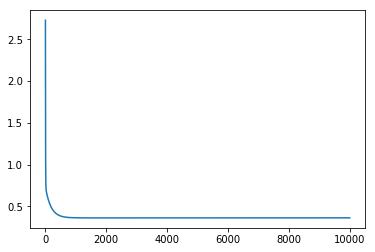

In [18]:
plt.plot(range(totalRep), costs)

In [19]:
print(costLamb(normx, normy, normW, 1))

0.36317156005140366
